# Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

# Q1

1. Activists have asserted that there is a strong gender bias in student evaluations of professors, with
male professors enjoying a boost in rating from this bias. While this has been celebrated by ideologues,
skeptics have pointed out that this research is of technically poor quality, either due to a low sample
size – as small as n = 1 (Mitchell & Martin, 2018), failure to control for confounders such as teaching
experience (Centra & Gaubatz, 2000) or obvious p-hacking (MacNell et al., 2015). We would like you to
answer the question whether there is evidence of a pro-male gender bias in this dataset.
Hint: A significance test is probably required.

In [22]:
rmp_df = pd.read_csv('data/rmpCapstoneNum.csv',
                            names=['Avg_rating','Avg_diff','n_ratings','fw_pepper', 'p_students_retake','n_online_class_rating','fw_male','fw_female'])

In [23]:
rmp_df.head()

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


In [24]:
rmp_qual_df = pd.read_csv('data/rmpCapstoneQual.csv',
                          names=['Major/Field','Universtiy','US_state'])
rmp_qual_df.head()

,Major/Field,Universtiy,US_state
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


In [25]:
rmp_tag_df = pd.read_csv('data/rmpCapstoneTags.csv',
                         names=['tough_grader','good_feedback','respected','lots_to_read',
                                'participation_matters','dscoywp','lots_homework','inspirationl',
                                "pop_quizes",'accessible','many_papers','clear_grading','hilarious',
                                'test_heavy','graded_by_few_things','amazing_lectures','extra_credit','caring',
                                'group_proj','lecture_heavy'])

In [26]:
rmp_tag_df.head()

,tough_grader,good_feedback,respected,lots_to_read,participation_matters,dscoywp,lots_homework,inspirationl,pop_quizes,accessible,many_papers,clear_grading,hilarious,test_heavy,graded_by_few_things,amazing_lectures,extra_credit,caring,group_proj,lecture_heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Comparison between two males and females**

Ho: There is no gender bias in students evaluations - males and female are rated the same

Ha: There is a difference in gender bias in students eval - males are rated higher average than females prof


In [27]:
male_rating_df = rmp_df[rmp_df['fw_male']==1]
female_rating_df = rmp_df[rmp_df['fw_female']==1]

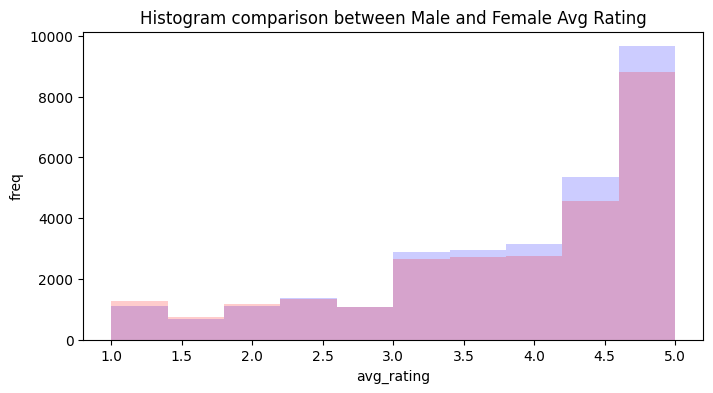

In [28]:
plt.figure(figsize=(8,4))
plt.hist(male_rating_df['Avg_rating'], alpha=0.2, color='blue')
plt.hist(female_rating_df['Avg_rating'], alpha=0.2, color='red')
plt.ylabel('freq')
plt.xlabel('avg_rating')
plt.title('Histogram comparison between Male and Female Avg Rating')
plt.show()

Performing a Mann Whitney U test as the data is not normally distributed 

In [29]:
stat, pvalue = stats.mannwhitneyu(male_rating_df['Avg_rating'], female_rating_df['Avg_rating'], alternative='greater')
print(stat, pvalue)


406757411.5 1.2219991544960195e-05


**Effect Size Calculation**
Better to quantify the magnintude of the bias

Plotting the violin plot for better visual clarity

In [30]:
# Create a new 'Gender' column based on the logic
def determine_gender(row):
    if row['fw_male'] == 1:
        return 'Male'
    elif row['fw_female'] == 1:
        return 'Female'
    else:
        return 'Not Identified'

rmp_df['Gender'] = rmp_df.apply(determine_gender, axis=1)

/var/folders/w1/b1w4nxzd69q4q3mzdg9170wm0000gn/T/ipykernel_42031/3047085761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rmp_df, x='Gender', y='Avg_rating', palette='muted', inner='quartile')


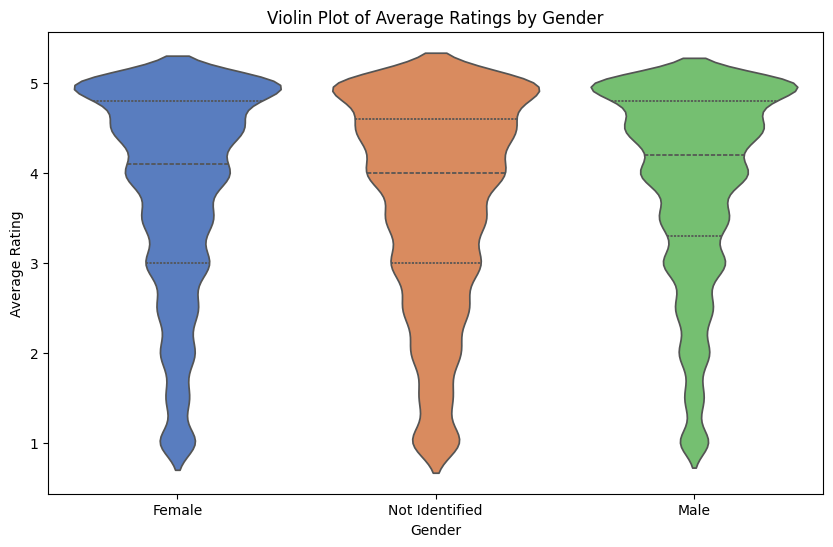

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=rmp_df, x='Gender', y='Avg_rating', palette='muted', inner='quartile')
plt.title('Violin Plot of Average Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

# Q3

3. What is the likely size of both of these effects (gender bias in average rating, gender bias in spread of
average rating), as estimated from this dataset? Please use 95% confidence and make sure to report
each/both.

In [32]:
# Gender bias in average rating
mean_diff = male_rating_df['Avg_rating'].mean() - female_rating_df['Avg_rating'].mean()

# Confidence Interval
male_std = male_rating_df['Avg_rating'].std()
female_std = female_rating_df['Avg_rating'].std()
male_n = len(male_rating_df)
female_n = len(female_rating_df)

standard_error_diff = np.sqrt((male_std**2/male_n) + (female_std**2/female_n))

#Conf.Interval Bounds
lower_confidence_bound = mean_diff - 1.96 * standard_error_diff
upper_confidence_bound = mean_diff + 1.96 * standard_error_diff

print(f"Lower ci bound: {lower_confidence_bound}")
print(f"Upper ci bound: {upper_confidence_bound}")


Lower ci bound: 0.04282180507484368
Upper ci bound: 0.07967755340812532


In [33]:
male_rating_df['Avg_rating'].values[2]

np.float64(2.5)

In [ ]:
# Gender bias spread
bootstrapped_means = []
num_samples = 2000
num_experiments = int(1e4) # 10000 runs
rng = np.random.default_rng(1)

for i in range(num_experiments):
    # Collect 2000 samples
    male_idx = rng.integers(low=0, high=len(male_rating_df), size=num_samples)
    female_idx = rng.integers(low=0, high=len(female_rating_df), size=num_samples)

    male_value = male_rating_df['Avg_rating'].values[male_idx]
    female_value = female_rating_df['Avg_rating'].values[female_idx]

    variance_ratio = np.var(male_value, ddof=1) / np.var(female_value, ddof=1)
    bootstrapped_means.append(variance_ratio)


lower_confidence_bound = np.percentile(bootstrapped_means, 2.5)
upper_confidence_bound = np.percentile(bootstrapped_means, 97.5)

print(f"Bootstrap 95% CI for Variance Ratio: [{lower_confidence_bound}, {upper_confidence_bound}]")

Bootstrap 95% CI for Variance Ratio: [0.8312999916717585, 0.9888166208446617]


This bias spread could indicates that if we were to sample this multiple times, 95% of the time the female ratings would be more variable than the men

# Q9

9. Build a regression model predicting average difficulty from all tags (the ones in the
rmpCapstoneTags.csv) file. Make sure to include the R2 and RMSE of this model. Which of these tags is
most strongly predictive of average difficulty? Hint: Make sure to address collinearity concerns.

In [35]:
rmp_df.head()

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female,Gender
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Female
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Not Identified
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,Male
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,Not Identified
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,Not Identified


In [36]:
avg_diff_tags_df = pd.merge(rmp_df['Avg_diff'], rmp_tag_df, how='left', left_index=True, right_index= True)
avg_diff_tags_df.head()

,Avg_diff,tough_grader,good_feedback,respected,lots_to_read,participation_matters,dscoywp,lots_homework,inspirationl,pop_quizes,...,many_papers,clear_grading,hilarious,test_heavy,graded_by_few_things,amazing_lectures,extra_credit,caring,group_proj,lecture_heavy
0,1.5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2,1,2,1,0,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,3,0,0,2,4,2,1,0,...,0,2,1,0,0,0,0,0,1,0
4,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
avg_diff_tags_df.dropna(inplace=True)

In [38]:
X = avg_diff_tags_df.drop(columns=['Avg_diff'])
y = avg_diff_tags_df['Avg_diff']

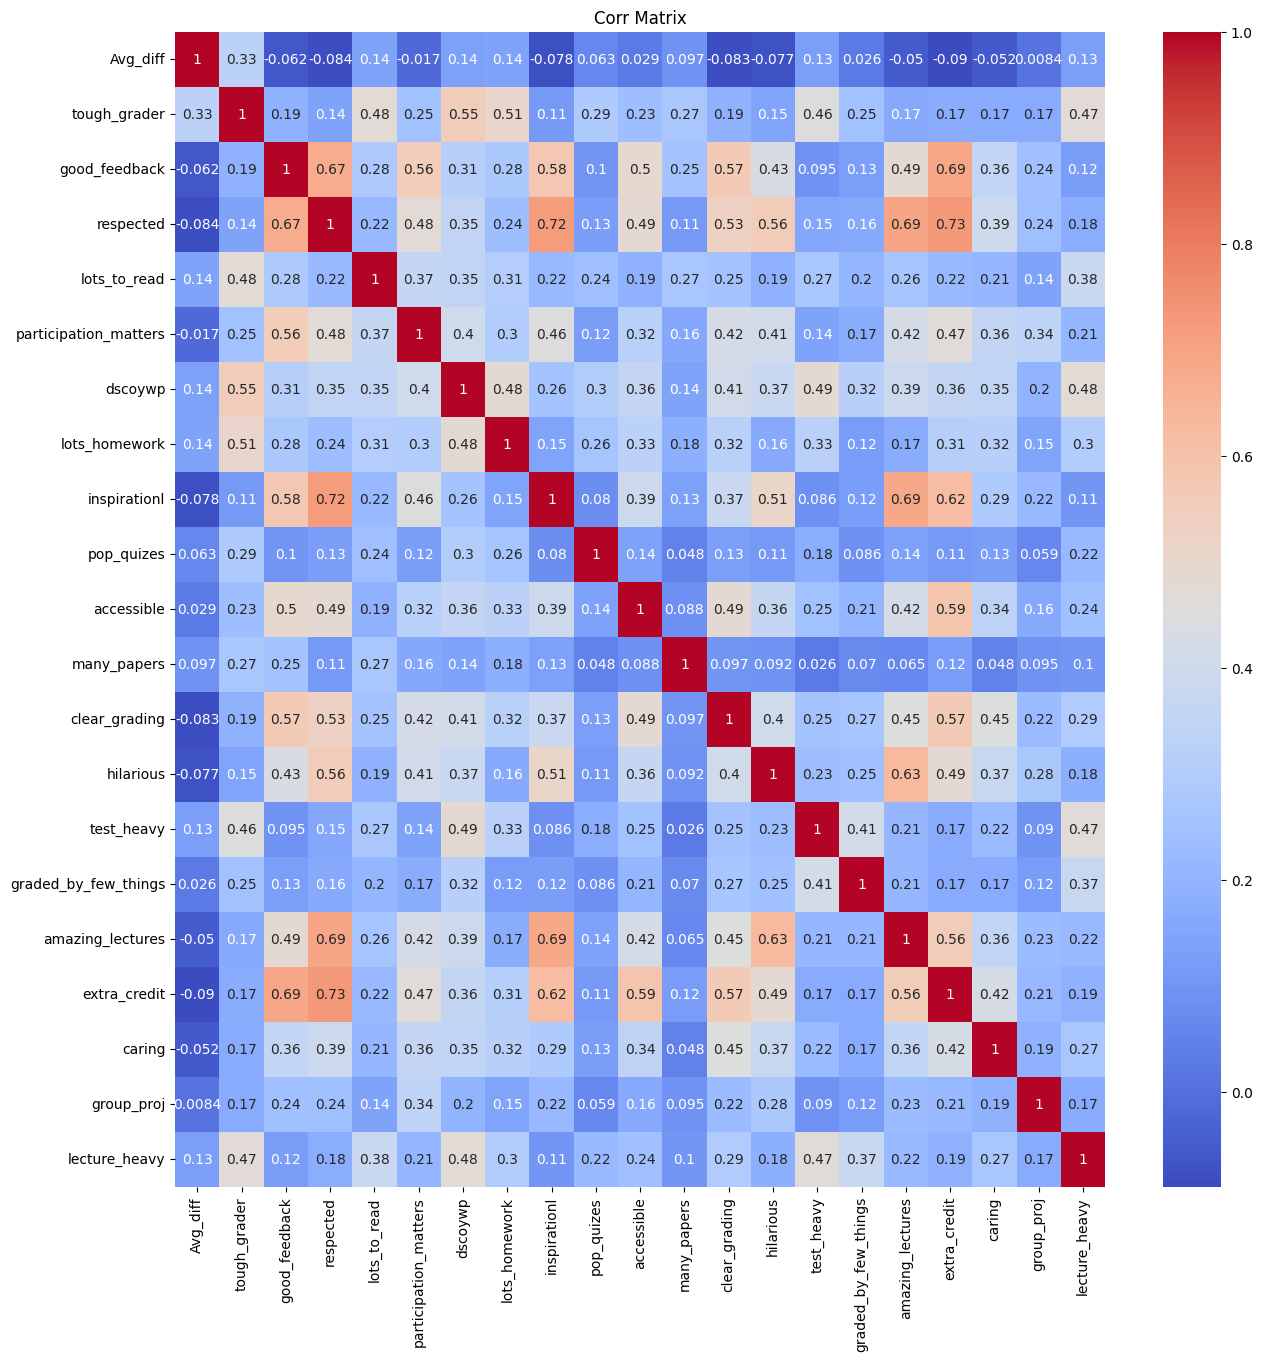

In [45]:
# Addressing multicolinearity concerns
plt.figure(figsize=(15,15))
corr_matrix = avg_diff_tags_df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Corr Matrix')
plt.show()

In [61]:
features = ['tough_grader', 'accessible', 'clear_grading', 'graded_by_few_things',
       'extra_credit']
X_sub = X[features]

In [62]:
X_train, X_test,y_train,y_test = train_test_split(X_sub,y, test_size=0.3, random_state=123)

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [64]:
r2 = r2_score(y_test,y_pred)
print(f"R^2: {r2}")

R^2: 0.1457892563805907


In [65]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.915720888532637
